In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
!unrar x drive/MyDrive/sorted_data.rar

Izlaz streaminga skraćen je na ovoliko posljednjih redaka: 5000.
Extracting  sorted_data/train/scab/a10782c3de6f75b0.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a11a9ec3d805677e.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a12cde80caedc557.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a13f87e591dfa108.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a15a6aeb3ceb1521.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a16c934ba6cc9cec.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a16ec5864adea78c.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a186c6d87a212fcf.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a1874e8c18f95be3.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a18af4fb4b83f890.jpg                   72%  OK 
Extracting  sor

In [ ]:
img_height, img_width = 512, 512
batch_size = 35

train_ds = tf.keras.utils.image_dataset_from_directory(
    "sorted_data/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "sorted_data/valid",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "sorted_data/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 16632 files belonging to 12 classes.
Found 1000 files belonging to 12 classes.
Found 1000 files belonging to 12 classes.


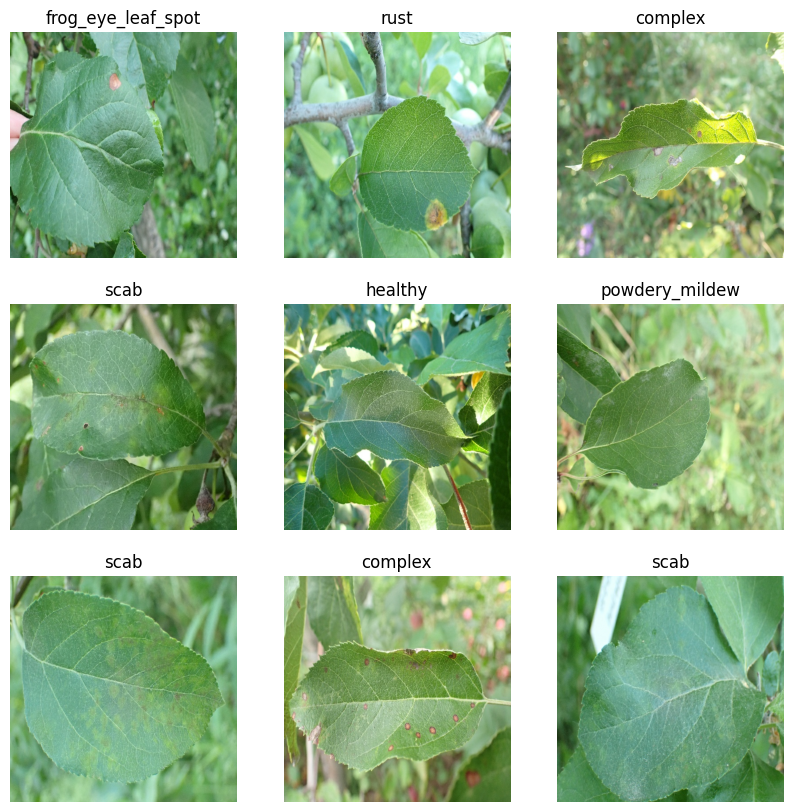

In [ ]:
class_names = ["complex", "frog_eye_leaf_spot", "frog_eye_leaf_spot complex", "healthy", "powdery_mildew", "powdery_mildew complex", "rust", "rust complex", "rust frog_eye_leaf_spot", "scab", "scab frog_eye_leaf_spot", "scab frog_eye_leaf_spot complex"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(512, 512, 3)),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation='relu'),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(64, 3, activation='relu'),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(64, 3, activation='relu'),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(128, 3, activation='relu'),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(12, activation='softmax')
    ]
)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will stop
    restore_best_weights=True  # Restore the best model weights when stopping
)

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 15,
    callbacks=[early_stopping]
)

Epoch 1/15
476/476 [==============================] - 148s 270ms/step - loss: 1.8054 - accuracy: 0.3229 - val_loss: 1.6617 - val_accuracy: 0.3760
Epoch 2/15
476/476 [==============================] - 125s 260ms/step - loss: 1.6626 - accuracy: 0.3933 - val_loss: 1.5776 - val_accuracy: 0.4260
Epoch 3/15
476/476 [==============================] - 120s 249ms/step - loss: 1.4335 - accuracy: 0.4913 - val_loss: 1.2049 - val_accuracy: 0.5660
Epoch 4/15
476/476 [==============================] - 116s 241ms/step - loss: 1.2148 - accuracy: 0.5706 - val_loss: 1.1054 - val_accuracy: 0.5990
Epoch 5/15
476/476 [==============================] - 122s 253ms/step - loss: 1.0495 - accuracy: 0.6319 - val_loss: 0.9228 - val_accuracy: 0.6930
Epoch 6/15
476/476 [==============================] - 121s 253ms/step - loss: 0.8785 - accuracy: 0.7069 - val_loss: 0.8218 - val_accuracy: 0.7380
Epoch 7/15
476/476 [==============================] - 127s 265ms/step - loss: 0.7568 - accuracy: 0.7502 - val_loss: 0.8662 -

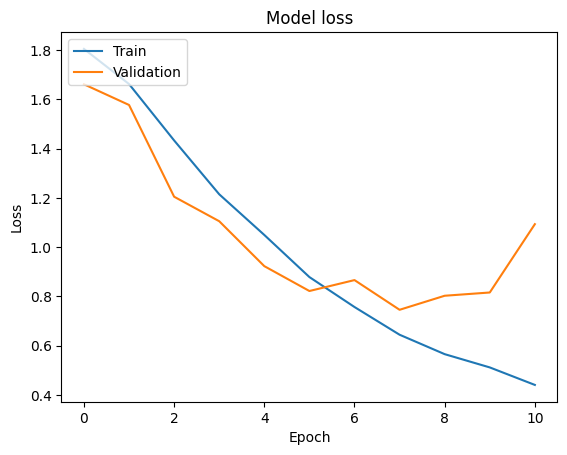

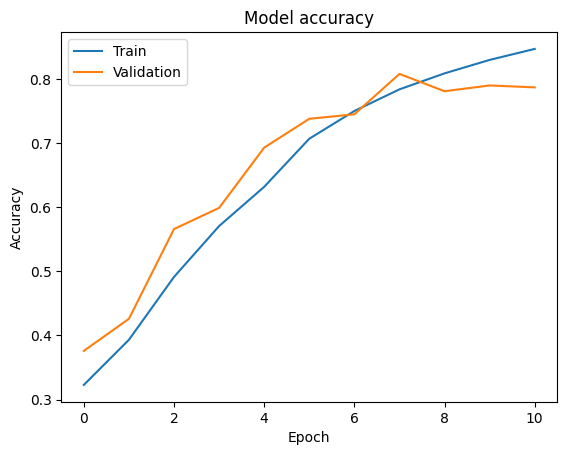

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(test_ds)

29/29 [==============================] - 6s 162ms/step - loss: 0.6880 - accuracy: 0.7980


[0.6879952549934387, 0.7979999780654907]

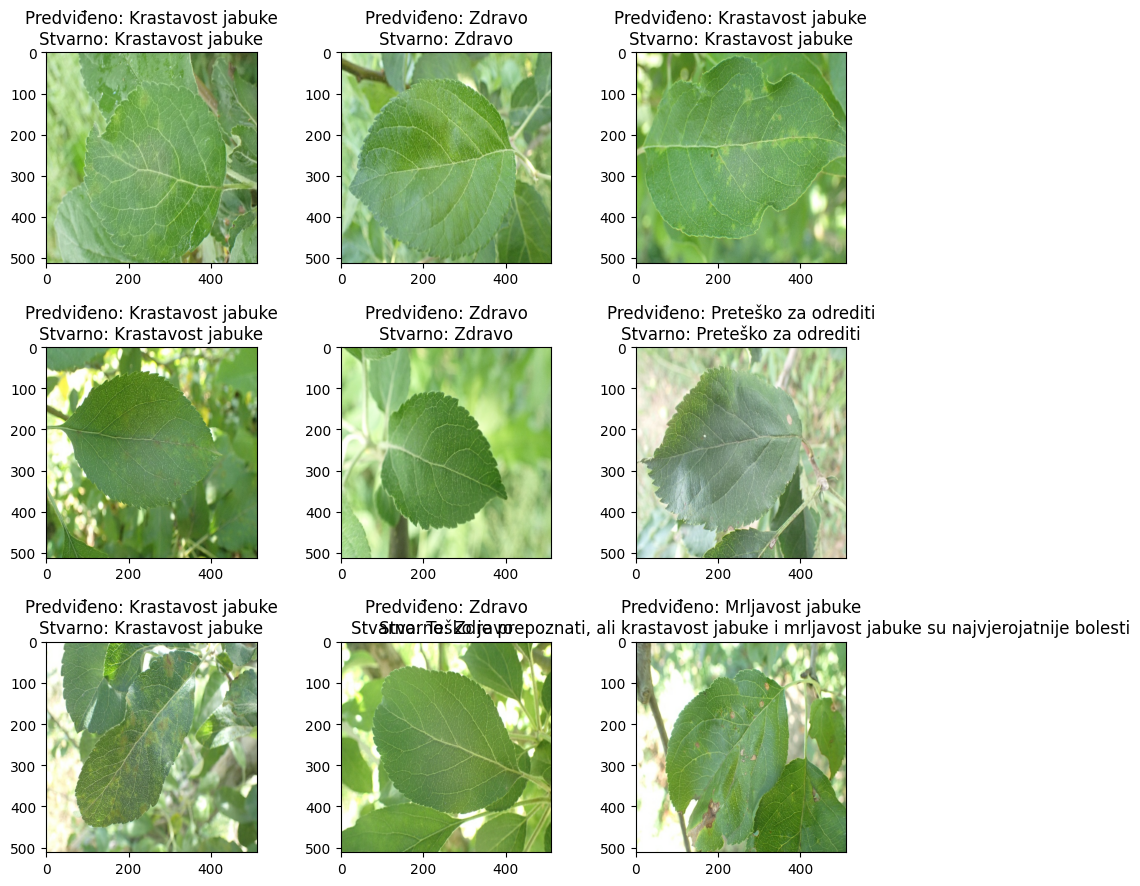

In [ ]:
import numpy
class_names = ["Preteško za odrediti", "Mrljavost jabuke", "Teško je prepoznati, ali mrljavost jabuke je najvjerojatnija bolest", "Zdravo", "Pepelnica", "Teško je prepoznati, ali pepelnica je najvjerojatnija bolest", "Hrđa jabuke", "Teško je prepoznati, ali hrđa jabuke je najvjerojatnija bolest", "Hrđa jabuke i mrljavost jabuke", "Krastavost jabuke", "Krastavost jabuke i mrljavost jabuke", "Teško je prepoznati, ali krastavost jabuke i mrljavost jabuke su najvjerojatnije bolesti"]

plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)  # Adjust margins and spacing
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Predviđeno: " + class_names[index] + "\nStvarno: " + class_names[labels[i]])

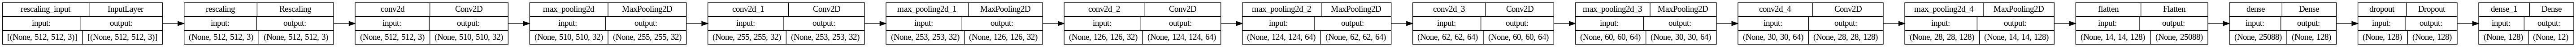

In [ ]:
from keras.utils import plot_model
from IPython.display import Image
model.build()

plot_model(model, to_file='model.png', show_shapes=True, rankdir='LR')
Image('model.png')

29/29 [==============================] - 5s 149ms/step
Confusion Matrix:


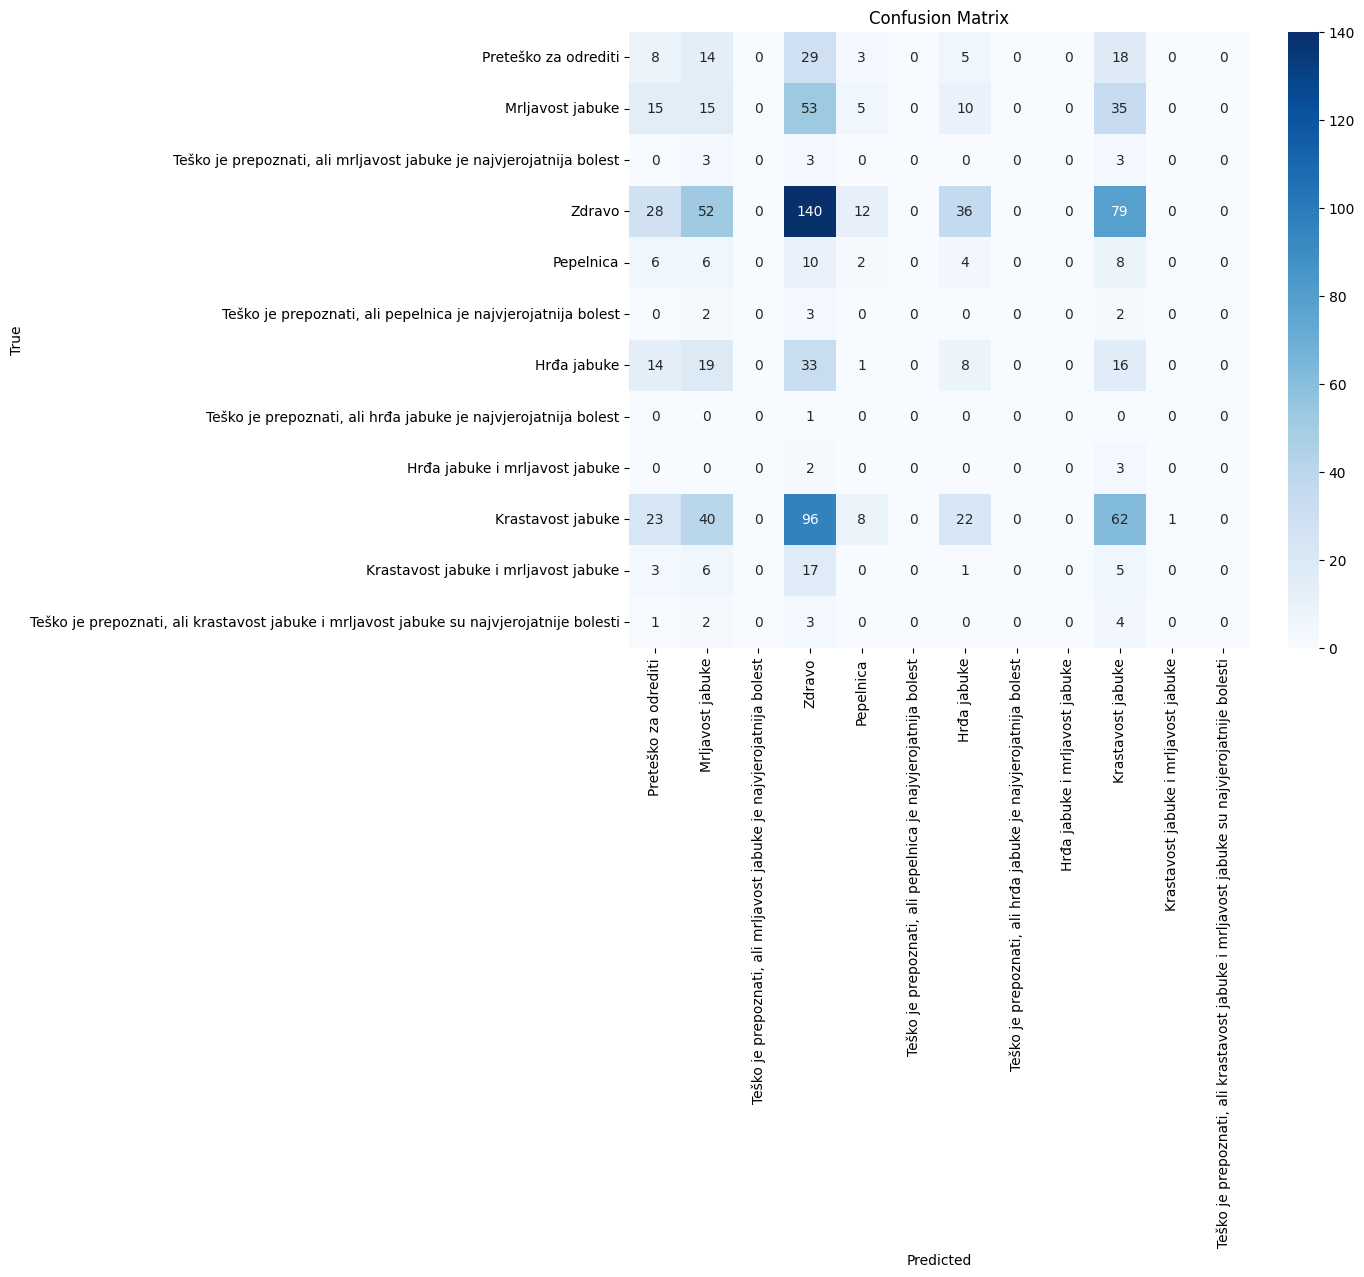

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

#class_names = ["complex", "frog_eye_leaf_spot", "frog_eye_leaf_spot complex", "healthy", "powdery_mildew", "powdery_mildew complex", "rust", "rust complex", "rust frog_eye_leaf_spot", "scab", "scab frog_eye_leaf_spot", "scab frog_eye_leaf_spot complex"]
# Make predictions on the test dataset

predictions = model.predict(test_ds)

predicted_labels = numpy.argmax(predictions, axis=1)
true_labels = numpy.concatenate([y for x, y in test_ds], axis=0)
confusion_mat = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
#print(confusion_mat)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()